In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\anubhab\time series\AirPassengers.csv')

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [5]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
from datetime import datetime

In [8]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# STATIONARITY

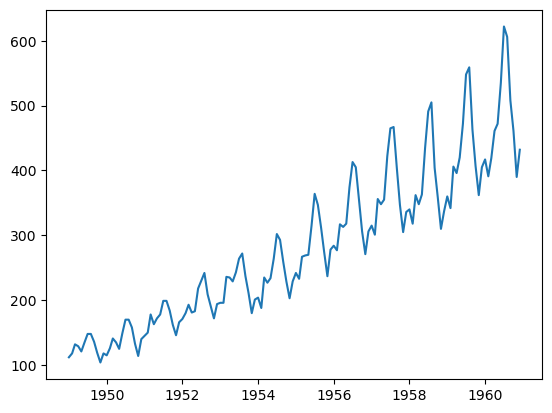

In [9]:
ts=data['#Passengers']
ts.head(10)
plt.plot(ts)

In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determining rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #pd.rolling_std(timeseries, window=12)
    
#plot rolling statistics:
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red',label='Rolling Mean')
    plt.plot(rolmean, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #perform dickey-fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]= value 
    print(dfoutput)

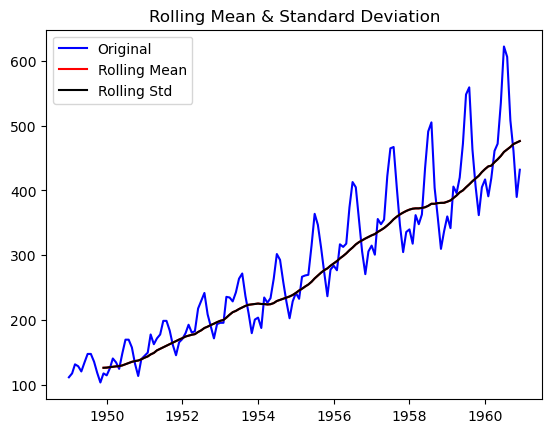

Results of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [41]:
test_stationarity(ts)